<a href="https://colab.research.google.com/github/IslamTayeb/life-edit-gene-classifier/blob/main/elbowTest5000genes_3filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Elbow Test with Filtering - 3.0 Relevant Genes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
raw_annotation = pd.read_csv("../../../data/Human.GRCh38.p13.annot.tsv", sep = '\t')
raw_annotation.head()

<ipython-input-3-fc0d9f0bafd2>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')


3.0

In [8]:
import pandas as pd

# Step 1: Load the raw_annotation table
# Replace with your actual file name and path
raw_annotation = pd.read_csv('../../EDA/Human.GRCh38.p13.annot.tsv', sep='\t')

# Step 2: Read the relevantGenes3.txt file
# Assuming relevantGenes3.txt contains genes separated by commas
with open('/content/drive/MyDrive/LifeEdit Personal/5000 Gene Combinations/relevant_genes_3.0_250.txt', 'r') as file:
    relevant_genes = file.read().strip().split(',')

# Step 3: Clean up the data
# Ensure 'GeneID' column is treated as a string (important if GeneID might not always be numeric)
raw_annotation['GeneID'] = raw_annotation['GeneID'].astype(str).str.strip()
relevant_genes = [gene.strip() for gene in relevant_genes]

# Step 4: Filter the raw_annotation table
filtered_data = raw_annotation[raw_annotation['GeneID'].isin(relevant_genes)]

# Step 5: Save or display the filtered data
filtered_data.to_csv('../../../data/localData/filtered_genes.csv', index=False)

print(filtered_data)


          GeneID        Symbol                             Description  \
18     113219467      MIR12136                          microRNA 12136   
39         57801          HES4  hes family bHLH transcription factor 4   
40          9636         ISG15           ISG15 ubiquitin like modifier   
42     100288175  LOC100288175            uncharacterized LOC100288175   
91          8510        MMP23B             matrix metallopeptidase 23B   
...          ...           ...                                     ...   
39312  107987359  LOC107987359            uncharacterized LOC107987359   
39346       4572          TRNQ                                tRNA-Gln   
39354       4512          COX1          cytochrome c oxidase subunit I   
39355       4574         TRNS1                                tRNA-Ser   
39356       4555          TRND                                tRNA-Asp   

                               Synonyms        GeneType    EnsemblGeneID  \
18                                 

<ipython-input-8-61ec1c7e8d15>:5: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv('/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv', sep='\t')


#### Must import Natural Language Toolkit
```
import ntlk 
nltk.download('punkt_tab')
```


Data Cleaning

In [12]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = filtered_data

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and tokenize descriptions
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    # Keep only alphanumeric characters and underscores
    text = re.sub(r'[^a-zA-Z0-9_ ]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
df['cleaned_description'] = df['Description'].apply(clean_text)
print(df[['Description', 'cleaned_description']].head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                     Description  \
18                                microRNA 12136   
39        hes family bHLH transcription factor 4   
40                 ISG15 ubiquitin like modifier   
42                  uncharacterized LOC100288175   
91                   matrix metallopeptidase 23B   
104                 uncharacterized LOC107984872   
132                 uncharacterized LOC112268220   
150                                          NaN   
168  long intergenic non-protein coding RNA 1777   
213                 uncharacterized LOC105376691   

                             cleaned_description  
18                                microrna 12136  
39         he family bhlh transcription factor 4  
40                 isg15 ubiquitin like modifier  
42                  uncharacterized loc100288175  
91                   matrix metallopeptidase 23b  
104                 uncharacterized loc107984872  
132                 uncharacterized loc112268220  
150                

<ipython-input-12-974141fdd351>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_description'] = df['Description'].apply(clean_text)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


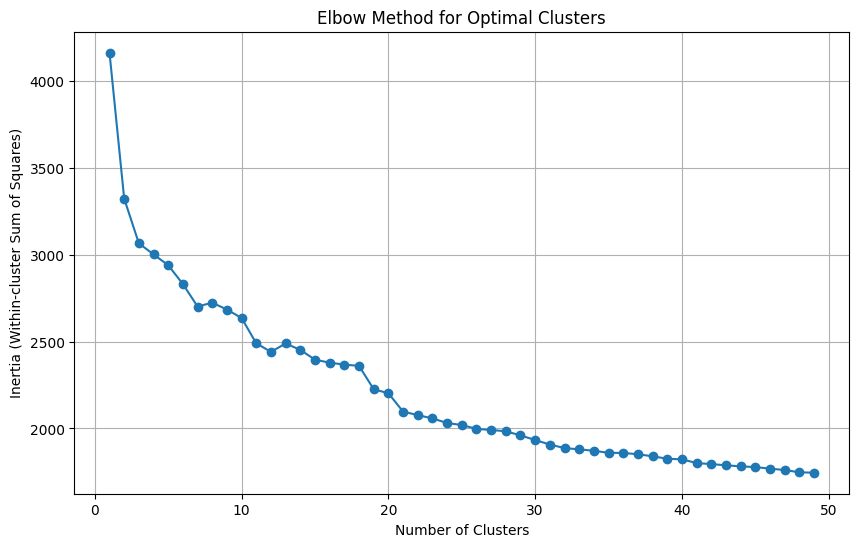

Optimal number of clusters explaining at least 90.0% variance: 1


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Set a range for possible cluster numbers
range_n_clusters = range(1, 50)  # Test from 1 to 20 clusters

# Calculate the inertia (within-cluster sum of squares) for each k
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Select the number of clusters explaining at least x% of the variance
variance_explained = 1 - np.array(inertia) / max(inertia)
x_percent_threshold = 0.9  # Adjust this value to your desired threshold (e.g., 90%)
optimal_clusters = np.argmax(variance_explained >= x_percent_threshold) + 1  # +1 because range_n_clusters starts at 1

print(f"Optimal number of clusters explaining at least {x_percent_threshold * 100}% variance: {optimal_clusters}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Perform K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_df)

# Prepare features and target
X = pd.concat([tfidf_df, df['cluster']], axis=1)  # Include clusters as features
y = df['']  # Use GeneID as the target -- FIX can't find error in use case, not GeneID

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


<ipython-input-19-9e82ed8b66bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_one'] = pca_result[:, 0]
<ipython-input-19-9e82ed8b66bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_two'] = pca_result[:, 1]


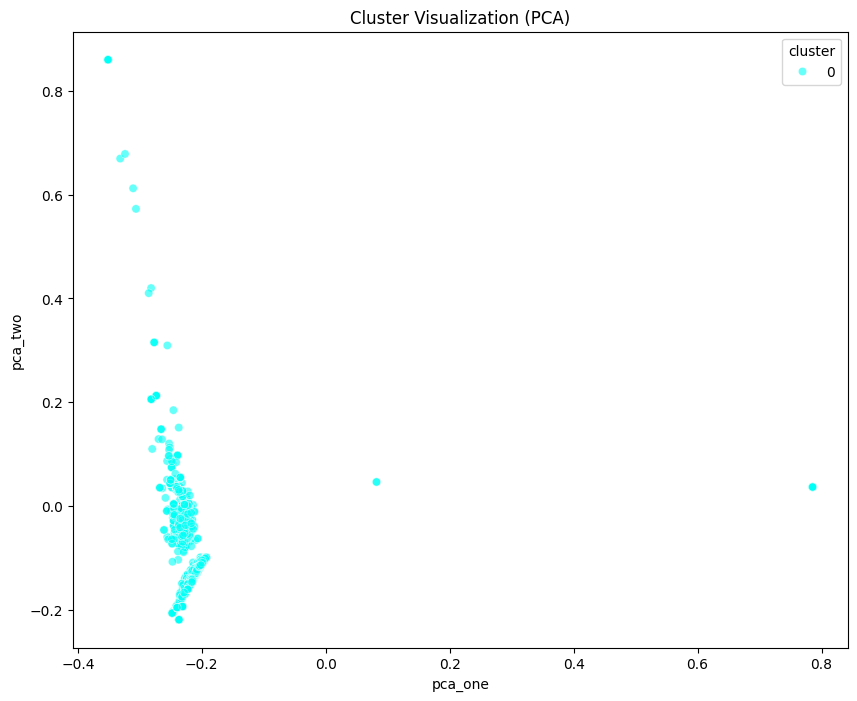

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce TF-IDF features to 2D using PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_df)

# Add PCA results and clusters to the DataFrame for visualization
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca_one', y='pca_two',
    hue='cluster',
    palette=sns.color_palette('hsv', optimal_clusters),
    data=df,
    legend="full",
    alpha=0.6
)
plt.title('Cluster Visualization (PCA)')
plt.show()